In [1]:
import sympy as smp
import numpy as np
from numba import jit
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [2]:
class FileSystemManager:
    def __init__(self):
        pass

    def open_file(self, text, filepath, flag):
        """
        Opens a file in read, write, or append mode.
        
        :param text: Text to write to the file if flag is 'w' or 'a'
        :param filepath: Path of the file to open
        :param flag: 'r' to read, 'w' to write, 'a' to append
        :return: File content if reading, None if writing or appending
        """
        try:
            if flag == 'r':
                with open(filepath, 'r') as f:
                    data = f.read()
                    return data  # return instead of print
            elif flag == 'w':
                with open(filepath, 'w') as f:
                    f.write(text)
            elif flag == 'a':
                with open(filepath, 'a') as f:
                    f.write(text)
            else:
                raise ValueError("Unsupported flag. Use 'r' for read, 'w' for write, or 'a' for append.")
        except FileNotFoundError:
            print(f"Error: File {filepath} not found.")
        except IOError as e:
            print(f"Error accessing file {filepath}: {e}")

In [3]:
class MagmaCalculator:
    """
    A class to interact with the Magma Calculator webpage and submit code for evaluation.
    
    Attributes:
    ----------
    output_file : str
        The name of the file where the output from the Magma Calculator will be saved.
    driver : webdriver.Chrome
        A Chrome web driver instance to automate browser interaction.
    url : str
        The URL of the Magma Calculator page.
    
    Methods:
    -------
    submit_code(code):
        Submits the given Magma code to the calculator and saves the result to a file.
    
    close():
        Closes the browser session.
    """
    
    def __init__(self, output_file="MagmaCalcResult"):
        """
        Initializes the MagmaCalculator with the given output file name.
        
        Parameters:
        ----------
        output_file : str, optional
            The name of the file where the result will be saved (default is "output.txt").
        """
        self.url = "http://magma.maths.usyd.edu.au/calc/"
        self.output_file = output_file
        self.file_manager = FileSystemManager()

    def submit_code(self, code):
        """
        Submits the given code to the Magma Calculator and saves the result to the output file.
        
        Parameters:
        ----------
        code : str
            The Magma code to be submitted for evaluation.
        
        Actions:
        -------
        - Opens the Magma Calculator webpage.
        - Finds the input box and enters the code.
        - Clicks the submit button.
        - Waits for the result to load.
        - Retrieves the result and writes it to the specified output file.
        """
        driver = webdriver.Chrome()
        try:
            driver.get(self.url)
            
            input_box = driver.find_element(By.ID, "input")
            input_box.clear()
            input_box.send_keys(code)
            
            submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")
            submit_button.click()
            
            time.sleep(5)
            
            result_element = driver.find_element(By.ID, "result")
            result_text = result_element.get_attribute('value')
            
            self.file_manager.open_file(code + '\n' + result_text, self.output_file, 'a')
        finally:
            driver.quit()

In [4]:
def save_div_result(quotient, remainder, path, mode='a'):
    with open(path, mode) as file:
        file.write(f"Quotient: {quotient.as_expr()}\n")
        file.write(f"Remainder: {remainder.as_expr()}\n")
    print(f'Results written to {path}')  

def save_f(f, path, mode='a'):
    with open(path, mode) as file:
        file.write(f"f: {f.as_expr()}\n")
    print(f'Results written to {path}')   

def save_results(data, path, mode='w'):
    with open(path, mode) as file:
        file.write(str(data) + '\n')
    print(f'Results written to {path}') 

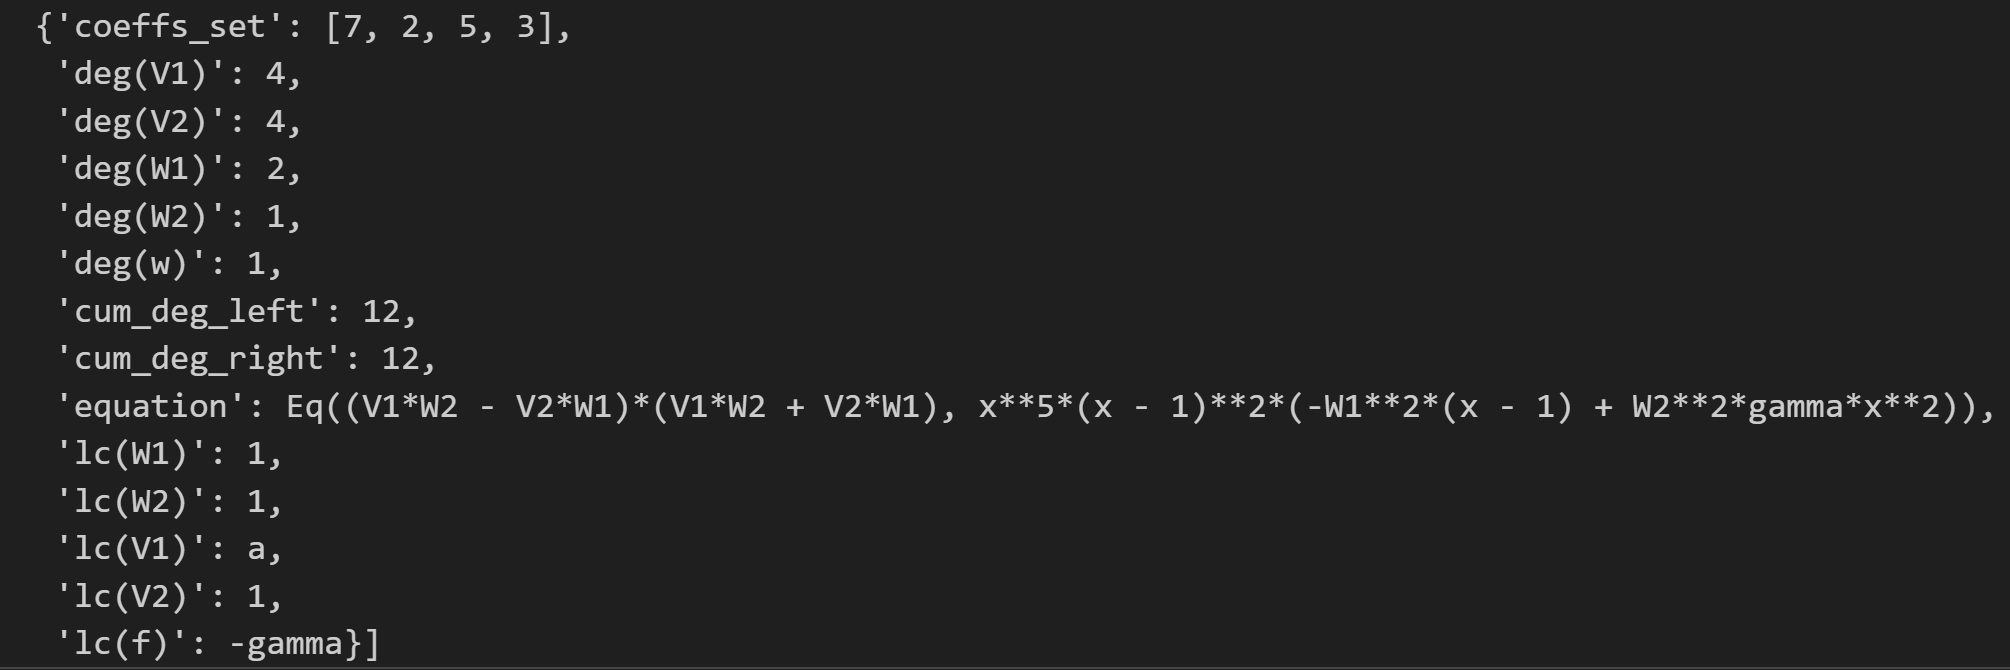

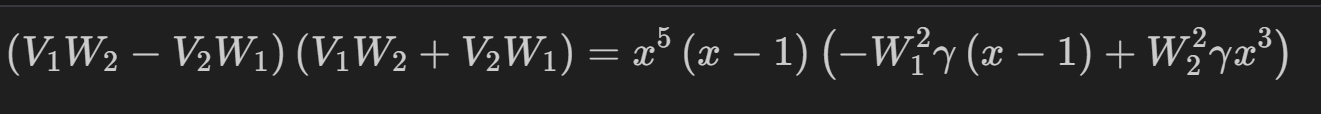

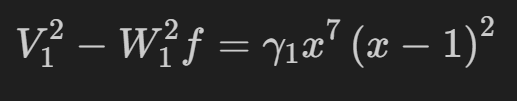

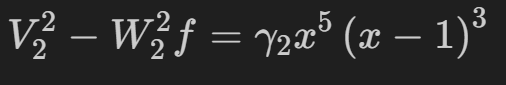

V1 * (x - x2) +- V2 * (x - x0)*(x - x1)

W1 = (x - x0)*(x - x1)

W2 = (x - x2)

w = (x - x3)

In [5]:
x, x0, x1, x2, x3, gamma, p, q, t, a1, a2, a3 = smp.symbols('x x0 x1 x2 x3 gamma p q t a1 a2 a3')

In [6]:
eq_1 = smp.Poly(a3 * (x - x3) * x**5, x)
eq_2 = smp.Poly((1/a3) * gamma * ((x - x2)**2 * (x - 1) * x**3 - (x - x0)**2 * (x - x1)**2 * (x - 1)**2), x)

In [7]:
eq_1

Poly(a3*x**6 - a3*x3*x**5, x, domain='ZZ[x3,a3]')

In [8]:
eq_2

Poly((2*gamma*x0 + 2*gamma*x1 - 2*gamma*x2 + gamma)/a3*x**5 + (-gamma*x0**2 - 4*gamma*x0*x1 - 4*gamma*x0 - gamma*x1**2 - 4*gamma*x1 + gamma*x2**2 + 2*gamma*x2 - gamma)/a3*x**4 + (2*gamma*x0**2*x1 + 2*gamma*x0**2 + 2*gamma*x0*x1**2 + 8*gamma*x0*x1 + 2*gamma*x0 + 2*gamma*x1**2 + 2*gamma*x1 - gamma*x2**2)/a3*x**3 + (-gamma*x0**2*x1**2 - 4*gamma*x0**2*x1 - gamma*x0**2 - 4*gamma*x0*x1**2 - 4*gamma*x0*x1 - gamma*x1**2)/a3*x**2 + (2*gamma*x0**2*x1**2 + 2*gamma*x0**2*x1 + 2*gamma*x0*x1**2)/a3*x - gamma*x0**2*x1**2/a3, x, domain='ZZ(x0,x1,x2,a3,gamma)')

In [9]:
solution_x0 = smp.solve(eq_2.subs(x, x3),x0)
solution_x0         

[(x1*x3**2 - x1*x3 - x2*sqrt(x3**3*(x3 - 1)) - x3**3 + x3**2 + x3*sqrt(x3**3*(x3 - 1)))/(x1*x3 - x1 - x3**2 + x3),
 (x1*x3**2 - x1*x3 + x2*sqrt(x3**3*(x3 - 1)) - x3**3 + x3**2 - x3*sqrt(x3**3*(x3 - 1)))/(x1*x3 - x1 - x3**2 + x3)]

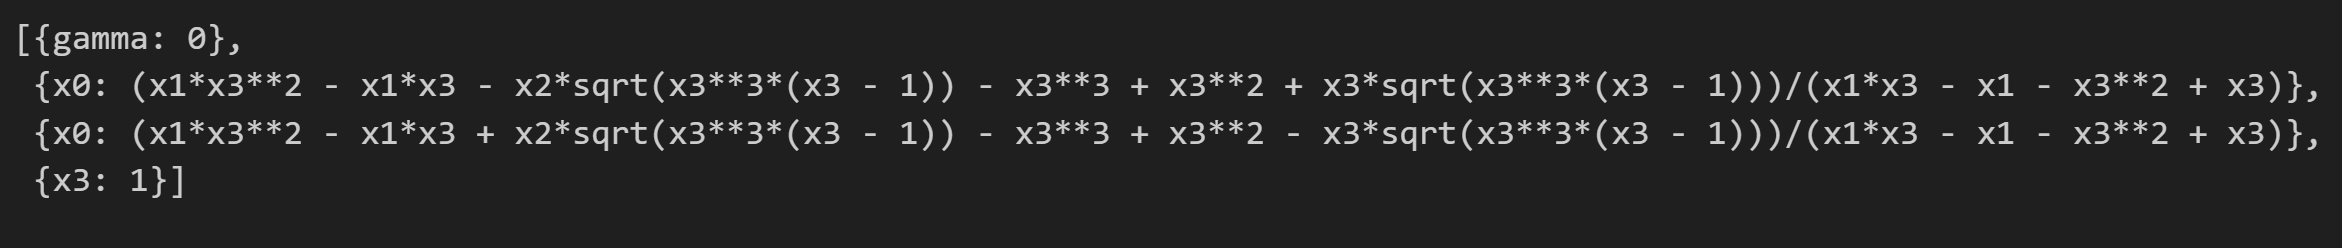

In [10]:
solution_x0 = solution_x0[1]
solution_x0

(x1*x3**2 - x1*x3 + x2*sqrt(x3**3*(x3 - 1)) - x3**3 + x3**2 - x3*sqrt(x3**3*(x3 - 1)))/(x1*x3 - x1 - x3**2 + x3)

In [11]:
solution_x0 = solution_x0.subs(smp.sqrt(x3**3 * (x3 - 1)), t / (1 - t**2)**2)
solution_x0 = solution_x0.subs(x3, 1/(1 - t**2))
solution_x0 = smp.simplify(solution_x0)
solution_x0

(-t**2*x1 + t*x1 - t*x2 + x2 - 1)/(t*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1))

In [12]:
eq_1 = eq_1.subs(x3, 1/(1 - t**2))
eq_1

a3*x**6 - a3*x**5/(1 - t**2)

In [13]:
eq_2 = eq_2.subs({x0 : solution_x0}).simplify()
eq_2 

gamma*(t*x**5*(-2*t**2*x1 + 2*t*x1 - 2*t*x2 + t*(2*x1 - 2*x2 + 1)*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1) + 2*x2 - 2)*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1) + x*(x**3*(t**2*(-x1**2 - 4*x1 + x2**2 + 2*x2 - 1)*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1)**2 + 4*t*(x1 + 1)*(t**2*x1 - t*x1 + t*x2 - x2 + 1)*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1) - (t**2*x1 - t*x1 + t*x2 - x2 + 1)**2) + x**2*(t**2*(2*x1**2 + 2*x1 - x2**2)*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1)**2 - 2*t*(x1**2 + 4*x1 + 1)*(t**2*x1 - t*x1 + t*x2 - x2 + 1)*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1) + 2*(x1 + 1)*(t**2*x1 - t*x1 + t*x2 - x2 + 1)**2) + x*(-t**2*x1**2*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1)**2 + 4*t*x1*(x1 + 1)*(t**2*x1 - t*x1 + t*x2 - x2 + 1)*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1) - (x1**2 + 4*x1 + 1)*(t**2*x1 - t*x1 + t*x2 - x2 + 1)**2) + 2*x1*(-t*x1*(t**3*x1 - t**2*x1 - t*x1 + t + x1 - 1) + (x1 + 1)*(t**2*x1 - t*x1 + t*x2 - x2 + 1))*(t**2*x1 - t*x1 + t*x2 - x2 + 1)) - x1**2*(t**2*x1 - t*x1 + t*x2 - x2 + 1)**2)/(a3*t

In [14]:
eq_1 = smp.Poly(eq_1, x)
eq_2 = smp.Poly(eq_2, x)

In [15]:
p1 = smp.Poly((x - (1 / (1 - t**2))), x)

eq_2, remainder = smp.div(eq_2, p1)

In [16]:
eq_2 = smp.Poly(eq_2, x)
eq_2.simplify()

Poly((2*gamma*t**4*x1**2 - 2*gamma*t**4*x1*x2 + gamma*t**4*x1 - 2*gamma*t**3*x1**2 + 2*gamma*t**3*x1*x2 - gamma*t**3*x1 - 2*gamma*t**2*x1**2 + 2*gamma*t**2*x1*x2 - gamma*t**2*x1 - 2*gamma*t**2*x2 + gamma*t**2 + 2*gamma*t*x1**2 - 2*gamma*t*x1*x2 + gamma*t*x1 - gamma*t + 2*gamma*x2 - 2*gamma)/(a3*t**4*x1 - a3*t**3*x1 - a3*t**2*x1 + a3*t**2 + a3*t*x1 - a3*t)*x**4 + (-gamma*t**7*x1**4 - 4*gamma*t**7*x1**3 + gamma*t**7*x1**2*x2**2 + 2*gamma*t**7*x1**2*x2 - gamma*t**7*x1**2 + gamma*t**6*x1**4 + 4*gamma*t**6*x1**3 - gamma*t**6*x1**2*x2**2 - 2*gamma*t**6*x1**2*x2 + gamma*t**6*x1**2 + 2*gamma*t**5*x1**4 + 8*gamma*t**5*x1**3 - 2*gamma*t**5*x1**2*x2**2 - 2*gamma*t**5*x1**2*x2 - 3*gamma*t**5*x1**2 + 2*gamma*t**5*x1*x2**2 + 4*gamma*t**5*x1*x2 - 2*gamma*t**5*x1 - 2*gamma*t**4*x1**4 - 8*gamma*t**4*x1**3 + 2*gamma*t**4*x1**2*x2**2 + 6*gamma*t**4*x1**2*x2 + 3*gamma*t**4*x1**2 - 2*gamma*t**4*x1*x2**2 + 2*gamma*t**4*x1 - gamma*t**3*x1**4 - 4*gamma*t**3*x1**3 + gamma*t**3*x1**2*x2**2 - 4*gamma*t**3*x1**2*

In [17]:
remainder

Poly(0, x, domain='ZZ(x1,x2,t,a3,gamma)')

In [18]:
V1_m = smp.Rational(1,2) * (eq_1 + eq_2)
V2_m= smp.Rational(1,2) * (-eq_1 + eq_2)

In [19]:
V1_m

Poly(a3/2*x**6 + a3/(2*t**2 - 2)*x**5 + (2*gamma*t**4*x1**2 - 2*gamma*t**4*x1*x2 + gamma*t**4*x1 - 2*gamma*t**3*x1**2 + 2*gamma*t**3*x1*x2 - gamma*t**3*x1 - 2*gamma*t**2*x1**2 + 2*gamma*t**2*x1*x2 - gamma*t**2*x1 - 2*gamma*t**2*x2 + gamma*t**2 + 2*gamma*t*x1**2 - 2*gamma*t*x1*x2 + gamma*t*x1 - gamma*t + 2*gamma*x2 - 2*gamma)/(2*a3*t**4*x1 - 2*a3*t**3*x1 - 2*a3*t**2*x1 + 2*a3*t**2 + 2*a3*t*x1 - 2*a3*t)*x**4 + (-gamma*t**7*x1**4 - 4*gamma*t**7*x1**3 + gamma*t**7*x1**2*x2**2 + 2*gamma*t**7*x1**2*x2 - gamma*t**7*x1**2 + gamma*t**6*x1**4 + 4*gamma*t**6*x1**3 - gamma*t**6*x1**2*x2**2 - 2*gamma*t**6*x1**2*x2 + gamma*t**6*x1**2 + 2*gamma*t**5*x1**4 + 8*gamma*t**5*x1**3 - 2*gamma*t**5*x1**2*x2**2 - 2*gamma*t**5*x1**2*x2 - 3*gamma*t**5*x1**2 + 2*gamma*t**5*x1*x2**2 + 4*gamma*t**5*x1*x2 - 2*gamma*t**5*x1 - 2*gamma*t**4*x1**4 - 8*gamma*t**4*x1**3 + 2*gamma*t**4*x1**2*x2**2 + 6*gamma*t**4*x1**2*x2 + 3*gamma*t**4*x1**2 - 2*gamma*t**4*x1*x2**2 + 2*gamma*t**4*x1 - gamma*t**3*x1**4 - 4*gamma*t**3*x1**3

In [ ]:
V2_m

Poly(-1/2*x**6 - 1/(2*t**2 - 2)*x**5 + (2*gamma*t**4*x1**2 - 2*gamma*t**4*x1*x2 + gamma*t**4*x1 - 2*gamma*t**3*x1**2 + 2*gamma*t**3*x1*x2 - gamma*t**3*x1 - 2*gamma*t**2*x1**2 + 2*gamma*t**2*x1*x2 - gamma*t**2*x1 - 2*gamma*t**2*x2 + gamma*t**2 + 2*gamma*t*x1**2 - 2*gamma*t*x1*x2 + gamma*t*x1 - gamma*t + 2*gamma*x2 - 2*gamma)/(2*t**4*x1 - 2*t**3*x1 - 2*t**2*x1 + 2*t**2 + 2*t*x1 - 2*t)*x**4 + (-gamma*t**7*x1**4 - 4*gamma*t**7*x1**3 + gamma*t**7*x1**2*x2**2 + 2*gamma*t**7*x1**2*x2 - gamma*t**7*x1**2 + gamma*t**6*x1**4 + 4*gamma*t**6*x1**3 - gamma*t**6*x1**2*x2**2 - 2*gamma*t**6*x1**2*x2 + gamma*t**6*x1**2 + 2*gamma*t**5*x1**4 + 8*gamma*t**5*x1**3 - 2*gamma*t**5*x1**2*x2**2 - 2*gamma*t**5*x1**2*x2 - 3*gamma*t**5*x1**2 + 2*gamma*t**5*x1*x2**2 + 4*gamma*t**5*x1*x2 - 2*gamma*t**5*x1 - 2*gamma*t**4*x1**4 - 8*gamma*t**4*x1**3 + 2*gamma*t**4*x1**2*x2**2 + 6*gamma*t**4*x1**2*x2 + 3*gamma*t**4*x1**2 - 2*gamma*t**4*x1*x2**2 + 2*gamma*t**4*x1 - gamma*t**3*x1**4 - 4*gamma*t**3*x1**3 + gamma*t**3*x1**2

In [21]:
V1_m_expr = V1_m.as_expr().simplify()
V2_m_expr = V2_m.as_expr().simplify()

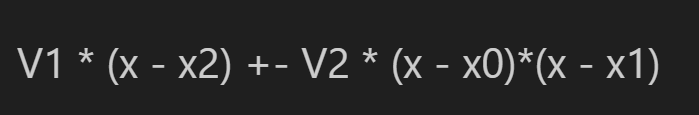

In [22]:
# eq1 = smp.Eq(smp.factor(V1_m_expr.subs(x, x2).simplify()), 0)
# print(eq1)
# solution_x2 = smp.solve([eq1], x2)
# solution_x2 = solution_x2[0][0]
# solution_x2

In [23]:
# V1_m_expr = V1_m_expr.subs({x2: solution_x2}).simplify()
# V2_m_expr = V2_m_expr.subs({x2: solution_x2}).simplify()

In [24]:
# eq2 = smp.Eq(smp.factor(V2_m_expr.subs({x: x1}).simplify()), 0)
# eq3 = smp.Eq(smp.factor(V2_m_expr.subs({x: solution_x0}).simplify()), 0)
# print(eq2)
# solution_x1 = smp.solve([eq2, eq3], x1)
# solution_x1 

In [ ]:
eq1 = smp.Eq(smp.factor(V1_m_expr.subs(x, x2).simplify()), 0)
eq2 = smp.Eq(smp.factor(V2_m_expr.subs(x, solution_x0).simplify()), 0)
eq3 = smp.Eq(smp.factor(V2_m_expr.subs(x, x1).simplify()), 0)
print(eq1)
print(eq2)
print(eq3)
solutions = smp.solve([eq1, eq2, eq3])
save_results(solutions, 'solutions.txt', mode='w')

KeyboardInterrupt: 

In [ ]:
solution_gamma = solutions[0][gamma]
solution_x1 = solutions[0][x1]
solution_x2 = solutions[0][x2]

In [20]:
V1_mq = (V1_m * V1_m)

In [ ]:
V1_mq = V1_mq.subs(gamma, solution_gamma)
V1_mq = V1_mq.subs(x1, solution_x1)
V1_mq = V1_mq.subs(x2, solution_x2)

In [21]:
V1_mq = smp.Poly(V1_mq, x)

In [ ]:
p1 = smp.Poly((x-solution_x2)**2, x)

quotient, remainder = smp.div(V1_mq, p1)
save_div_result(quotient, remainder,'divsion.txt', mode='a')

In [23]:
V1_q = quotient

In [24]:
f = smp.Poly(V1_q - solution_gamma*x**5 * (x - 1)**3,x)

In [25]:
f = f.simplify()

In [26]:
def factor_coeffs(f, val):
    return sum(smp.factor(coeff)*val**i for i, coeff in enumerate(reversed(smp.Poly(f, val).all_coeffs())))

In [ ]:
f_main = factor_coeffs(f, x)
save_f(f_main,'f.txt',mode='a')

In [28]:
calc = MagmaCalculator()

In [29]:
def check_order(equation):
    """Function that helps to check an order of possible torison points of given function"""
    code = f"""
    P<x> := PolynomialRing(Rationals());
    C1 := HyperellipticCurve({equation});
    J1 := Jacobian(C1);
    TorsionSubgroup(J1);
    ClebschInvariants(C1);
    IgusaClebschInvariants(C1);
    IgusaInvariants(C1);"""
    calc.submit_code(code)

In [30]:
def get_magma_expr(f):
    content, primitive_poly = f.as_content_primitive() 
    integer_poly = primitive_poly * content.denominator  
    integer_poly = smp.Poly(integer_poly, x)
    magma_expr = str(integer_poly.as_expr()).replace('**', '^')
    return magma_expr

In [35]:
def curve_search(parameters_set):
    for value in parameters_set:
        f = f_main.subs(t,value)
        magma_expr = get_magma_expr(f)
        check_order(magma_expr)

In [ ]:
curve_search(range(2,10))